In [ ]:
# PACOTES NECESSÁRIOS
# pipenv install scikit-learn scipy pandas matplotlib statsmodels fastapi uvicorn 
# pydantic pingouin seaborn ipykernel

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

### **Carga dos Dados**

In [2]:
# Abrir o dataset
df_pontuacao = pd.read_csv('./datasets/pontuacao_teste.csv')

In [4]:
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [5]:
df_pontuacao.head()

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85


In [7]:
df_pontuacao.tail(10)

,horas_estudo,pontuacao_teste
91,44.9,750
92,45.1,755
93,45.3,760
94,45.5,765
95,45.7,770
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795
100,46.9,800


### **EDA (Análise Exploratória de Dados)**

In [8]:
# Medidas estatísticas das variáveis
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


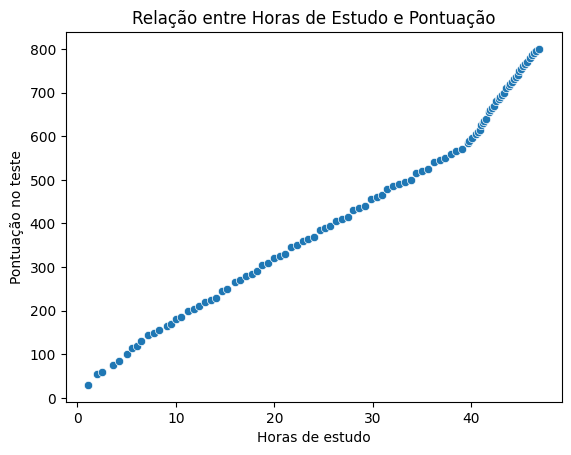

In [ ]:
# Plot de Dispersão
# X = horas_estudo
# Y = pontuacao_teste
sns.scatterplot(data=df_pontuacao, x='horas_estudo', y='pontuacao_teste')
plt.title("Relação entre Horas de Estudo e Pontuação")
plt.xlabel("Horas de estudo")
plt.ylabel("Pontuação no teste")
plt.show()

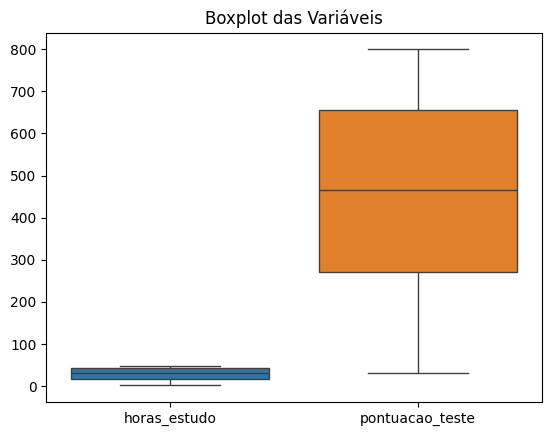

In [ ]:
# Verificar outliers
sns.boxplot(data=df_pontuacao)
plt.title("Boxplot das Variáveis")
plt.show()

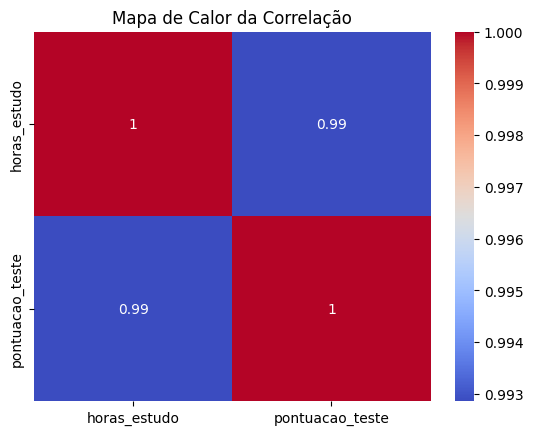

In [ ]:
# Verificar a correlação entre as variáveis
sns.heatmap(df_pontuacao.corr('pearson'), annot=True, cmap='coolwarm')
plt.title("Mapa de Calor da Correlação")
plt.show()

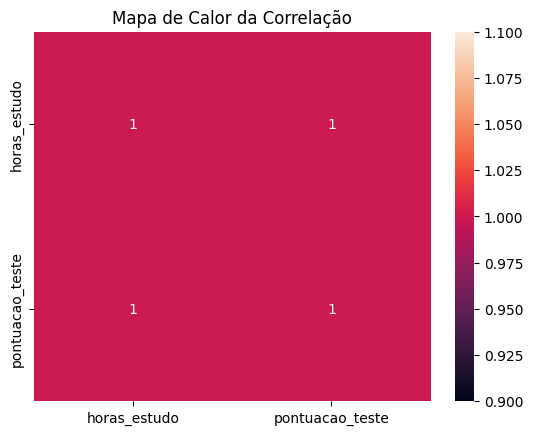

In [ ]:
# Verificar a correlação entre as variáveis
sns.heatmap(df_pontuacao.corr('spearman'), annot=True)
plt.title("Mapa de Calor da Correlação")
plt.show()

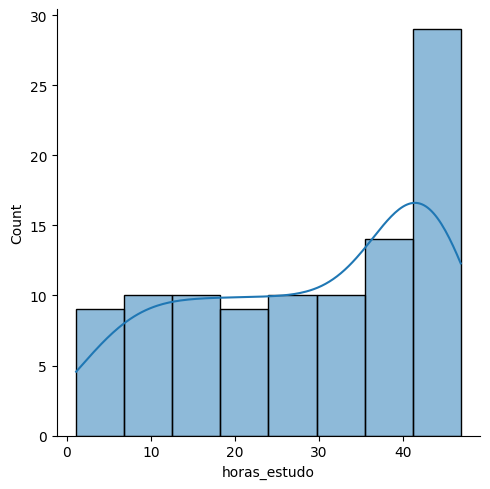

In [ ]:
# Histograma das variáveis
sns.displot(df_pontuacao, x='horas_estudo', kde=True)

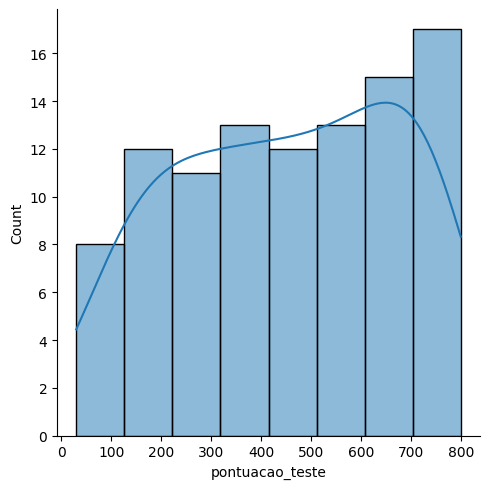

In [21]:
# Histograma das variáveis
sns.displot(df_pontuacao, x='pontuacao_teste', kde=True)

### **Treinar Modelo**

In [23]:
# Dividir dataset em treino e teste
# Reshape - Quando temos apenas uma feature, precisamos transformar o DataFrame em um array 2D
X = df_pontuacao['horas_estudo'].values.reshape(-1, 1) # type: ignore
y = df_pontuacao['pontuacao_teste'].values.reshape(-1, 1) # type: ignore

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [ ]:
# Instanciar o modelo a ser treinado
reg_model = LinearRegression()

In [26]:
# Treinar o modelo
reg_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
# Imprimir a equação da reta
# y = a*x + b

# type: ignore
intercept = reg_model.intercept_[0]
coef = reg_model.coef_.flatten()[0]

print(f"A equação da reta é y = {coef:.4f}*x + {intercept:.4f}")

A equação da reta é y = 15.6426*x + 8.4766


### **Validar Modelo: Métricas**

In [48]:
# Predição dos valores com base no conjunto de teste
y_pred = reg_model.predict(X_test)

In [60]:
# Calcular métricas R-squared
# R-squared representa a variação na variável dependente que pode ser explicada pela variável independente.
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
r2 = r2_score(y_test, y_pred)

print(f"R-squared: {r2:.4f}")

R-squared: 0.9828


In [54]:
# Calcular métrica MAE - Mean Absolute Error
# A MAE mede a média dos erros absolutos entre os valores previstos e os valores reais.
# MAE = Media(|yi - xi|)
# MAE é menos sensível a outliers em comparação com o MSE.
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 22.9575


In [ ]:
# Calcular MSE - Mean Squared Error
# O MSE mede a média dos erros quadráticos entre os valores previstos e os valores reais.
# O MSE penaliza mais os erros maiores devido ao quadrado.
# MSE = Media((yi - xi)^2)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 766.9973


In [ ]:
# Calcular ERMSE - Square Root Mean Squared Error
# O ERMSE mede a média dos erros quadráticos entre os valores previstos e os valores reais.
# O ERMSE penaliza mais os erros maiores devido ao quadrado.
# ERMSE = Raiz(Media((yi - xi)^2))
ermse = root_mean_squared_error(y_test, y_pred)

print(f"Root Mean Squared Error (ERMSE): {ermse:.4f}")

Root Mean Squared Error (RMSE): 27.6947


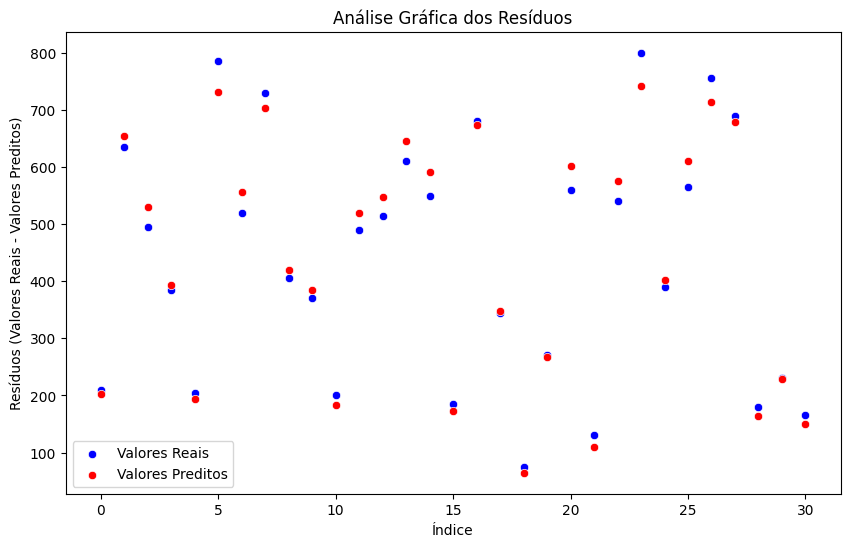

In [70]:
# Análise Gráfica dos Resíduos
x_axis = range(len(y_test))
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Valores Reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Valores Preditos')
plt.legend()
plt.title("Análise Gráfica dos Resíduos")
plt.xlabel("Índice")
plt.ylabel("Resíduos (Valores Reais - Valores Preditos)")
plt.show()

### **Análise de Resíduos**

In [ ]:
# Calcular resíduos
residuos = y_test - y_pred

In [73]:
# Calcular resíduos padronizados (Standardization)
# Para cada elemento de um conjunto (X - média) / desvio padrão
from scipy.stats import zscore
residuos_std = zscore(residuos)

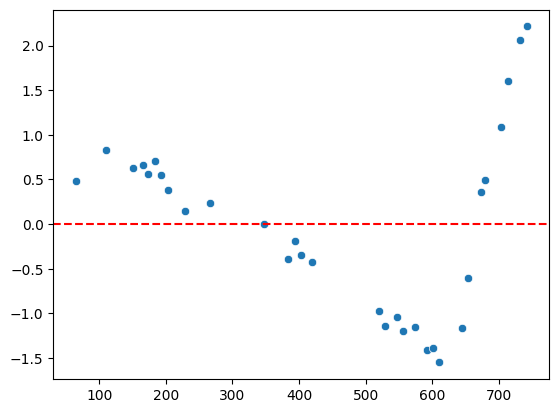

In [ ]:
# Verificar linearidade do modelo:
# Se os resíduos estiverem entre -2 e 2 na escala padronizada, o modelo é considerado linear.

# Verificar a homogeneidade das variâncias (Homocedasticidade):
# Se os valores estiverem em torno da reta, temos homocedasticidade.
# Caso contrário, se tivermos alguma tendência (funil, arco), temos heterocedasticidade.

sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1)) # pyright: ignore[reportAttributeAccessIssue]
plt.axhline(0, color='red', linestyle='--')

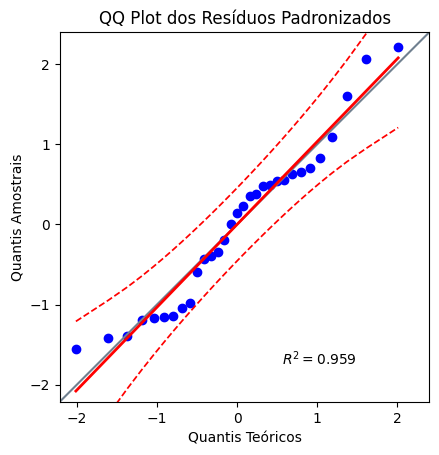

In [84]:
# Checar se os resíduos seguem uma distribuição normal
## QQ (Quantile-Quantile Plot): avalia se uma amostra segue uma distribuição teórica específica (normal, por exemplo). 
import pingouin as pg
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel("Quantis Teóricos")
plt.ylabel("Quantis Amostrais")
plt.title("QQ Plot dos Resíduos Padronizados")
plt.show()

In [91]:
# Teste de Normalidade de Shapiro-Wilk
# H0: Os dados seguem uma distribuição normal.
# H1: Os dados não seguem uma distribuição normal.
# Se o p-valor for maior que 0.05 não rejeita H0, caso contrário rejeita H0.
stat_sh, p_value_sh = shapiro(residuos.reshape(-1))
print("Estatística de Shapiro-Wilk {} e P-valor: {}".format(stat_sh, p_value_sh)) 

Estatística de Shapiro-Wilk 0.9500532226161755 e P-valor: 0.15663817850304637


In [92]:
# Teste de Normalidade de Kolgorov-Smirnov.
# H0: Os dados seguem uma distribuição normal.
# H1: Os dados não seguem uma distribuição normal.
# Se o p-valor for maior que 0.05 não rejeita H0, caso contrário rejeita H0.
stat_ks, p_value_ks = kstest(residuos.reshape(-1), 'norm')
print("Estatística de Kolgorov-Smirnov {} e P-valor: {}".format(stat_ks, p_value_ks)) 

Estatística de Kolgorov-Smirnov 0.48355808450512827 e P-valor: 3.395368995814077e-07


### **Fazer predições com o modelo**

In [99]:
# Se eu estudar 30.4 horas, qual será minha pontuação no teste?
reg_model.predict(np.array([[30.4]]))

array([[484.01220436]])

In [103]:
# Quantas horas estudar para obter 600 pontos pelo modelo?
# y = ax + b
# y -b = ax
# (y - b) / a = x
# x = (y - b) / a
(600 - intercept) / coef

np.float64(37.81485802710669)

### **Salvar modelo para utilização posterior**

In [109]:
import joblib
joblib.dump(reg_model, './reg_model_pontuacao.pkl')

['./reg_model_pontuacao.pkl']